### Q1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure tokeep all customers who have done transactions with us and select the join type accordingly.


In [1]:
import pandas as pd
cust=pd.read_csv("Customer.csv")
trans=pd.read_csv("Transactions.csv")
prod_cat_info=pd.read_csv("prod_cat_info.csv")

In [2]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [3]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [4]:
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
tbl=pd.merge(cust,trans,left_on='customer_Id',right_on='cust_id',how='inner')
Customer_Final=pd.merge(tbl,prod_cat_info,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='inner')
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


### 2. Prepare a summary report for the merged data set.
#### a. Get the column names and their corresponding data types
#### b. Top/Bottom 10 observations
#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
#### d. Frequency tables for all the categorical variables


In [6]:
#column names and their corresponding data types
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [7]:
#Top 10 observations
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [8]:
#Bottom 10 observations
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,268914,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,269519,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,273524,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,272141,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,272141,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,268097,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


In [9]:
#“Five-number summary” for continuous variables 
cont_var=Customer_Final[['Qty','Rate','Tax','total_amt']]

In [10]:
def var_summary(x):
    return pd.Series([ x.min(),x.dropna().quantile(0.25),x.median(),x.dropna().quantile(0.75),x.max()], 
                  index=[ 'MIN', 'Q1' , 'MEDIAN' ,'Q3','MAX'])

num_summary=cont_var.apply(lambda x: var_summary(x)).T
num_summary

,MIN,Q1,MEDIAN,Q3,MAX
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,312.00,710.00,1109.000,1500.0
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5


In [11]:
#d. Frequency tables for all the categorical variables

In [12]:
freq_table_Store_type = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table_Store_type 

Store_type,Flagship store,MBR,TeleShop,e-Shop
Gender,,,,
F,2264,2264,2147,4558
M,2313,2395,2353,4750


In [13]:

freq_table_prod_cat= pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table_prod_cat

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,994,2949,1439,2328,1529,1994
M,1004,3116,1518,2570,1469,2134


In [14]:

freq_table_prod_subcat = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table_prod_subcat

prod_subcat,Academic,Audio and video,Bath,Cameras,Children,Comics,Computers,DIY,Fiction,Furnishing,Kids,Kitchen,Mens,Mobiles,Non-Fiction,Personal Appliances,Tools,Women
Gender,,,,,,,,,,,,,,,,,,
F,518,470,506,447,481,485,468,484,485,477,1035,501,1410,469,496,474,510,1517
M,449,482,516,538,553,546,490,504,557,530,960,536,1502,562,507,498,552,1529


In [15]:
print(Customer_Final.groupby('Store_type')['customer_Id'].count())
print(Customer_Final.groupby('city_code')['customer_Id'].count())
print(Customer_Final.groupby('Store_type')['customer_Id'].count())
print(Customer_Final.groupby('prod_cat')['customer_Id'].count())
print(Customer_Final.groupby('prod_subcat')['customer_Id'].count())
print(Customer_Final.groupby('Gender')['customer_Id'].count())

Store_type
Flagship store    4577
MBR               4661
TeleShop          4504
e-Shop            9311
Name: customer_Id, dtype: int64
city_code
1.0     2258
2.0     2270
3.0     2411
4.0     2422
5.0     2360
6.0     2127
7.0     2356
8.0     2330
9.0     2178
10.0    2333
Name: customer_Id, dtype: int64
Store_type
Flagship store    4577
MBR               4661
TeleShop          4504
e-Shop            9311
Name: customer_Id, dtype: int64
prod_cat
Bags                1998
Books               6069
Clothing            2960
Electronics         4898
Footwear            2999
Home and kitchen    4129
Name: customer_Id, dtype: int64
prod_subcat
Academic                967
Audio and video         952
Bath                   1023
Cameras                 985
Children               1035
Comics                 1031
Computers               958
DIY                     989
Fiction                1043
Furnishing             1007
Kids                   1997
Kitchen                1037
Mens               

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.


In [16]:
#histograms for all continuous variables

In [17]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.hist(Customer_Final.Qty)
plt.show()

<Figure size 640x480 with 1 Axes>

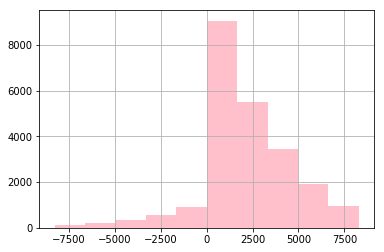

In [18]:
plt.grid(True)
plt.hist(Customer_Final.total_amt,color='pink')
plt.show()

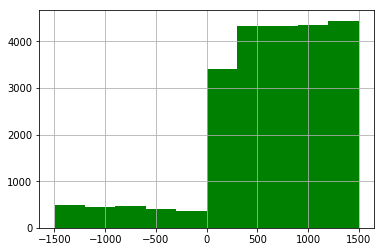

In [19]:
plt.grid(True)
plt.hist(Customer_Final.Rate,color='green')
plt.show()

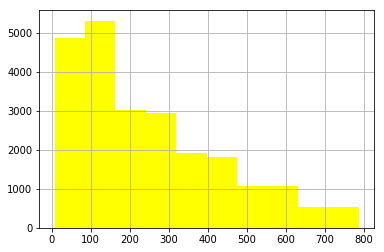

In [20]:
plt.grid(True)
plt.hist(Customer_Final.Tax,color='yellow')
plt.show()

In [21]:
#frequency bars for categorical variables

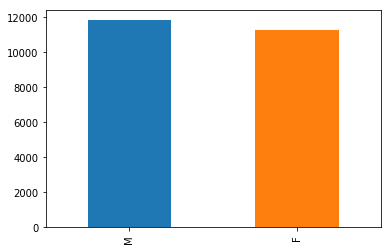

In [22]:
Customer_Final.Gender.value_counts().plot(kind='bar')

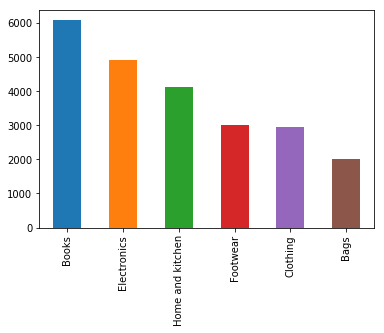

In [23]:
Customer_Final.prod_cat.value_counts().plot(kind='bar')

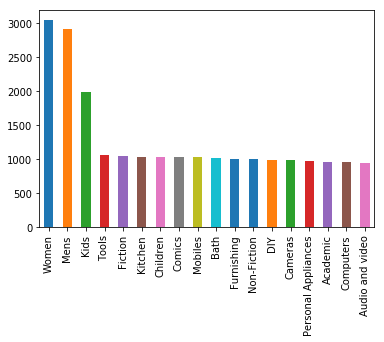

In [24]:
Customer_Final.prod_subcat.value_counts().plot(kind='bar')

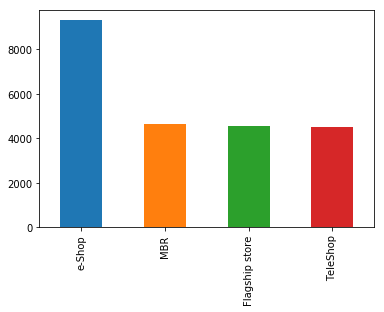

In [25]:
Customer_Final.Store_type.value_counts().plot(kind='bar')

### 4. Calculate the following information using the merged dataset :
#### a. Time period of the available transaction data
#### b. Count of transactions where the total amount of transaction was negative

In [26]:
Customer_Final.tran_date=pd.to_datetime(Customer_Final.tran_date)

In [27]:
diff=Customer_Final.tran_date.max()-Customer_Final.tran_date.min()

In [28]:
import numpy as np
year=round(diff/np.timedelta64(1,'Y'),1)
month=round(diff/np.timedelta64(1,'M'),1)

day=round(diff/np.timedelta64(1,'D'),1)

In [29]:
min=Customer_Final.tran_date.min().strftime('%Y-%m-%d')
max=Customer_Final.tran_date.max().strftime('%Y-%m-%d')

In [30]:
print("From :",min,"   To :",max)
print("Diff_in_no_of_Days:",day)
print("Diff_in_no_of_months: ",month)
print("Diff_in_no_of_years: ",year)

From : 2011-01-02    To : 2014-12-02
Diff_in_no_of_Days: 1430.0
Diff_in_no_of_months:  47.0
Diff_in_no_of_years:  3.9


In [31]:
 #Count of transactions where the total amount of transaction was negative
Customer_Final[Customer_Final.total_amt<0]['cust_id'].count()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [32]:
M=Customer_Final[Customer_Final.Gender=='M'].groupby(['prod_cat'])['total_amt'].sum()
print(" Among Males Most Popular ",M.nlargest(1))
F=Customer_Final[Customer_Final.Gender=='F'].groupby(['prod_cat'])['total_amt'].sum()
print(" Among Females Most Popular ",F.nlargest(1))

 Among Males Most Popular  prod_cat
Books    6645972.775
Name: total_amt, dtype: float64
 Among Females Most Popular  prod_cat
Books    6164692.235
Name: total_amt, dtype: float64


### 6.Which City code has the maximum customers and what was the percentage of customers from that city?

In [33]:
max_city_code=Customer_Final['city_code'].value_counts().nlargest(1)
perc=round((Customer_Final['city_code'].value_counts().max()/Customer_Final['customer_Id'].count())*100,2)
print("City code has the maximum customers :",max_city_code)
print("Percentage of Customers ",perc,"%")

City code has the maximum customers : 4.0    2422
Name: city_code, dtype: int64
Percentage of Customers  10.51 %


### 7. Which store type sells the maximum products by value and by quantity?


In [34]:
Customer_Final.groupby('Store_type')['total_amt','Qty'].sum().sort_values(['total_amt','Qty'],ascending=False).head(1)

,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763


### 8.What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [35]:
df=Customer_Final[(Customer_Final.Store_type=='Flagship store')& ((Customer_Final.prod_cat=='Electronics')|(Customer_Final.prod_cat=='Clothing'))]
df.groupby(['Store_type','prod_cat'])['total_amt'].sum()


Store_type      prod_cat   
Flagship store  Clothing       1194423.23
                Electronics    2215136.04
Name: total_amt, dtype: float64

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [36]:
Customer_Final[(Customer_Final.Gender=='M')& (Customer_Final.prod_cat=='Electronics')]['total_amt'].sum()

5703109.425

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [37]:
tcount=Customer_Final[Customer_Final.total_amt>0].groupby('customer_Id')['Qty'].count().reset_index().rename(columns={'Qty':'No_Of_Transactions'})
print("No of Customers :",tcount[tcount.No_Of_Transactions>10]['customer_Id'].count())
tcount[tcount.No_Of_Transactions>10].reset_index(drop=True)


No of Customers : 6


,customer_Id,No_Of_Transactions
0,266794,11
1,270535,11
2,270803,11
3,272741,11
4,273014,11
5,274227,11


### 11. For all customers aged between 25 - 35, find out:
#### a. What was the total amount spent for “Electronics” and “Books” product categories?
#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [38]:
Customer_Final.DOB=pd.to_datetime(Customer_Final.DOB)

In [39]:
Customer_Final['Age']=Customer_Final.tran_date.max().year-Customer_Final.DOB.apply(lambda x:x.year)
cust_25to35=Customer_Final[(Customer_Final.Age>25) & (Customer_Final.Age<35)]

In [40]:
# a.
df=cust_25to35[(( cust_25to35.prod_cat=='Electronics')|(cust_25to35.prod_cat=='Books'))]
total=df['total_amt'].sum()
print("total amount spent is",total)

total amount spent is 9199634.405


In [41]:
dff=cust_25to35[(cust_25to35.tran_date>='2014-01-01') & (cust_25to35.tran_date<='2014-03-01')]
tot=dff['total_amt'].sum()
print("total amount spent is",tot)

total amount spent is 521411.93
